# Mapeo perceptual

El mapeo perceptual (perceptual mapping) es una técnica utilizada para identificar la percepción que tiene el mercado acerca de un producto o servicio (y en general de una marca). La identificación se basa en la aplicación de encuestas a clientes o usuarios aunque también pueden utilizarse técnicas de minería de opiniones.



Un producto del mapeado perceptual es una gráfica en la que pueden visualizarse las características de diferentes marcas como la siguiente (de acuerdo a la percepción de los clientes):


<img src="https://www.learnmarketing.net/perceptualmap.gif" width=400/>

**Fuente**:  https://www.learnmarketing.net/


# Objetivo

El mapeo perceptual se utiliza para responder preguntas como las siguientes:

* ¿Cómo **percibe** el mercado nuestra marca en relación a la competencia?
* ¿Cuáles marcas se consideran las más **cercanas competidoras** a la nuestra?
* ¿Cómo debe **posicionarse** un nuevo producto con respecto a productos disponibles en el mercado?
* ¿Cuáles **atributos** son los **preferidos** por el mercado?
* ¿Qué productos se asocian a los **atributos más deseables** por el mercado?



# Metodología

1. Identificar/seleccionar los atributos relevantes para el mercado de interés.
2. Diseñar y aplicar la encuesta. 
3. Análisis de resultados.
4. Creación del mapa perceptual.

# Características de la encuesta

<img src = "https://drive.google.com/uc?export=view&id=1wJ7JQpOgeqU6ob2qZZ0_JwD8fuqNEiR4" width="500"/>



**Ejemplo**. Evaluamos opciones bancarias a partir de atributos como los siguientes:

1. Costo del servicio de banca en línea.
2. Anualidad de tarjetas de crédito.
3. Tasa de interés de créditos (hipotecarios, al consumo, ...).
4. Atención ejecutivos.
5. Disponibilidad de cajeros automáticos.
6. Tiempo de espera en sucursales.
7. Atención telefónica.
8. Seguridad de los servicios ...
9. ...









# Análisis de factores

**Si se incluyen más de dos atributos en el estudio, ¿cómo construimos el mapa perceptual?** 

<img src = "https://drive.google.com/uc?export=view&id=1PjS8HaX5s_fk_Lys_JppuohYv16SFjzQ" width="500"/>

El mapeado perceptual puede realizarse aplicando la técnica de **análisis de factores**, la cual, descrita de forma intuitiva, permite explicar un conjunto de variables llamadas **manifiestas** (que pueden medirse) a partir de un conjunto más pequeño de variables llamadas **latentes (o factores)**. Los factores no son medibles directamente, sino indirectamente a partir de las variables manifiestas.  

Como ejemplo, para un producto manufacturado los atributos *durabilidad*, *resistencia* (ambos medibles) son variables manifiestas de un factor oculto: **calidad**. 

<img src = "https://drive.google.com/uc?export=view&id=13vLI5dHYd514J-ubbOLx4O-wOXSm4OMD" width="500"/>

Describiré la técnica de análisis de factores con un ejemplo muy intuitivo, en el contexto de la educación. Considera el siguiente conjunto de datos que corresponde a calificaciones obtenidas por estudiantes universitarios en exámenes de diferentes asignaturas:



In [ ]:
dat <- read.csv("testscoresdata.csv")
head(dat)

,Student,Grammar,Spelling,Composition,Algebra,Geometry,Trigonometry
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,90,85,88,56,60,49
2,2,23,33,31,90,78,79
3,3,65,59,49,60,58,55
4,4,88,92,94,90,93,98
5,5,22,19,33,45,34,12
6,6,82,78,79,85,79,90


Usando análisis de factores, las variables manifiestas de este conjunto (Grammar, Spelling, Composition, Algebra, Geometry, Trigonometry) pueden explicarse a partir de dos factores, los cuales podemos etiquetar (un tanto arbitrariamente) como: habilidades matemáticas y habilidades para el lenguaje.  

Dado un conjunto de datos, para aplicar el análisis de factores es necesario responder dos preguntas:

1. **¿Cuántos factores son necesarios para explicar a las variables manifiestas?**
2. **¿Cuál es la estructura de los factores?**

Responderemos a cada una de ellas a través de R.

## Número de factores

Existen varios criterios que pueden utilizarse para definir el número de factores. En esta sección exploraremos algunos de ellos.

### Matriz de correlaciones

Podemos empezar por explorar los datos mediante una matriz de correlaciones, o correlograma. Para nuestro caso, la matriz de correlaciones es la siguiente:

In [ ]:
vars_manif <- dat[,2:7] #variables manifestas 

cor(vars_manif)

,Grammar,Spelling,Composition,Algebra,Geometry,Trigonometry
Grammar,1.0000000,0.9659483,0.92443832,-0.13545802,0.2089232,0.2507193
Spelling,0.9659483,1.0000000,0.89278817,-0.15552666,0.1915935,0.2721774
Composition,0.9244383,0.8927882,1.00000000,0.03810389,0.3438626,0.3413699
Algebra,-0.1354580,-0.1555267,0.03810389,1.00000000,0.8806798,0.8729162
Geometry,0.2089232,0.1915935,0.34386258,0.88067980,1.0000000,0.9536237
Trigonometry,0.2507193,0.2721774,0.34136991,0.87291622,0.9536237,1.0000000


Se visualiza mejor a partir de un correlograma:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



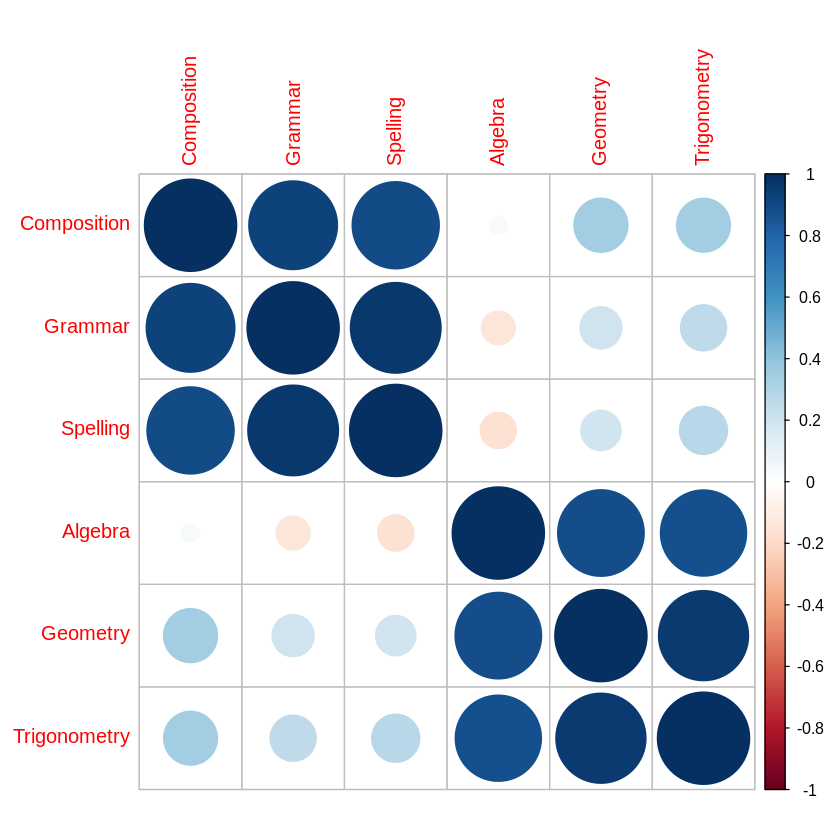

In [ ]:
install.packages("corrplot")
library(corrplot)

corrplot(cor(vars_manif), order = "hclust")

En la matriz de correlaciones pueden observarse dos grupos de variables fuertemente correlacionados.



###Total de factores [valores propios]

**La suma de los valores propios de la matriz de correlaciones es igual al número de variables manifiestas** *texto en cursiva*. Por lo anterior, un criterio frecuentemente utilizado para definir el número de factores es identificar cuántos valores propios de esta matriz son mayores a la unidad. 

En la siguiente celda obtenemos los valores propios de la matriz de correlación de las variables manifiestas de nuestro ejemplo:


In [ ]:
eig <- eigen(cor(vars_manif))
eig$values

[1] 3.334873852 2.431236985 0.137298334 0.057348762 0.031841202 0.007400866

Observa que son dos valores propios mayores a uno, por lo que se refuerza la idea de que las variables manifiestas se explican con dos factores. 

Gráficamente podemos observar la estructura de los valores propios:

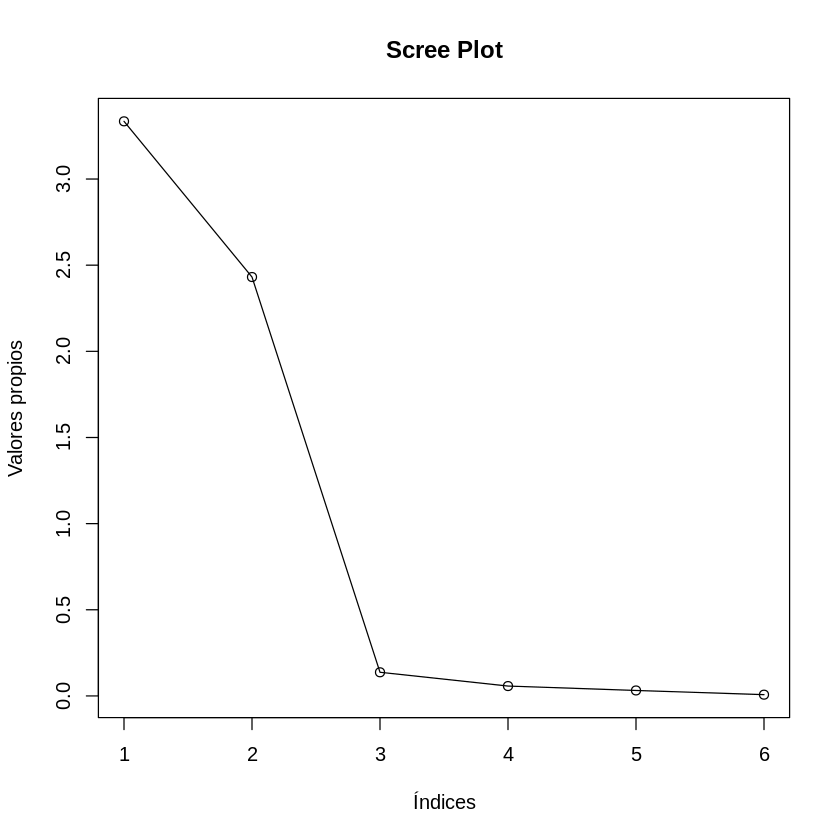

In [ ]:
plot(eig$values, main="Scree Plot", t='l', ylab = "Valores propios", xlab="Índices")
points(eig$values)

A través de la librería $\texttt{nFactors}$ podemos evaluar diferentes criterios para identificar el número de factores, como se muestra en la siguiente celda:

In [ ]:
install.packages("nFactors")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘psych’




In [ ]:
library(nFactors)
nScree(vars_manif, cor=T)

Loading required package: lattice


Attaching package: ‘nFactors’


The following object is masked from ‘package:lattice’:

    parallel




  noc naf nparallel nkaiser
1   2   2         2       2

Todos los criterios sugieren que las variables manifiestas pueden explicarse mediante 2 factores (el criterio nkaiser es equivalente al conteo de valores propios mayores a uno).

## Estructura

**¿Cómo se relacionan los factores con las variables maniefiestas?**


Una vez identificado el número de factores, podemos preocuparnos por asociar a las variables manifiestas con los factores. Para eso, podemos revisar la correlación de cada variable manifiesta con los factores identificados.


La información puede obtenerse mediante la librería ```psych```:


In [ ]:
library(psych)
fit <- principal(vars_manif,nfactors=2, rotate="varimax")

La correlación entre cada variable manifiesta y cada factor está registrada en el atributo $\texttt{loadings}$

In [ ]:
fit$loadings


Loadings:
             RC1    RC2   
Grammar       0.989       
Spelling      0.981       
Composition   0.947  0.174
Algebra      -0.166  0.969
Geometry      0.184  0.965
Trigonometry  0.227  0.956

                 RC1   RC2
SS loadings    2.951 2.816
Proportion Var 0.492 0.469
Cumulative Var 0.492 0.961

Revisando la tabla (loadings), observamos que las variables $\texttt{Grammar}$, $\texttt{Spelling}$ y $\texttt{Composition}$ se correlacionan fuertemente al primer factor, el cual puede interpretarse como **habilidad para el lenguaje**, mientras que las variables $\texttt{Algebra}$, $\texttt{Geometry}$ y $\texttt{Trigonometry}$ se asocian al segundo factor, el cual puede interpretarse como **habilidad matemática**.

**Estructura**

1. Habilidad para el lenguaje:
  * Grammar.
  * Spelling.
  * Composition.
2. Habilidad matemática: 
  * Algebra.
  * Geometry.
  * Trigonometry.


Observamos también que el primer factor explica el 49% de la información en la matriz de correlaciones y con los dos se explica el 96%.

Los factores pueden explicarse como una combinación lineal de las variables manifiestas, por ejemplo, la habilidad matemática puede definirse como:

$\texttt{HabMat} = 0.36 \texttt{Algebra}+0.34\texttt{Geometry}+0.33\texttt{Trigonometry}$

Los pesos de la combinación pueden leerse del objeto ```fit$weights```

In [ ]:
fit$weights

,RC1,RC2
Grammar,0.34191828,-0.04456066
Spelling,0.33963570,-0.04646619
Composition,0.31925112,0.01117554
Algebra,-0.11086057,0.36157268
Geometry,0.01083039,0.34104688
Trigonometry,0.02604433,0.33554399


A partir de los pesos con los que se construyen los dos factores, podemos evaluar las dos habilidades en cada uno de los estudiantes que presentaron los exámenes. Esta información ya está disponible en el atributo $\texttt{scores}$ del objeto $\texttt{fit}$: 

In [ ]:
fit$scores

RC1,RC2
0.9153038,-0.5302432
-1.4485777,0.9167256
-0.2393435,-0.3530964
0.9443561,1.2404663
-1.4692481,-1.4411465
0.5122126,0.8352546
1.2581872,-0.5666709
-0.9580358,1.2334432
0.0487361,-1.2620155
0.4364093,-0.0727173


In [ ]:
vars_manif[1:10,]

,Grammar,Spelling,Composition,Algebra,Geometry,Trigonometry
,<int>,<int>,<int>,<int>,<int>,<int>
1,90,85,88,56,60,49
2,23,33,31,90,78,79
3,65,59,49,60,58,55
4,88,92,94,90,93,98
5,22,19,33,45,34,12
6,82,78,79,85,79,90
7,96,95,94,45,67,53
8,43,36,45,89,93,87
9,66,76,45,34,44,40


Construimos una gráfica de dispersión en la que podemos visualizar la proyección de cada estudiante en estos dos factores:

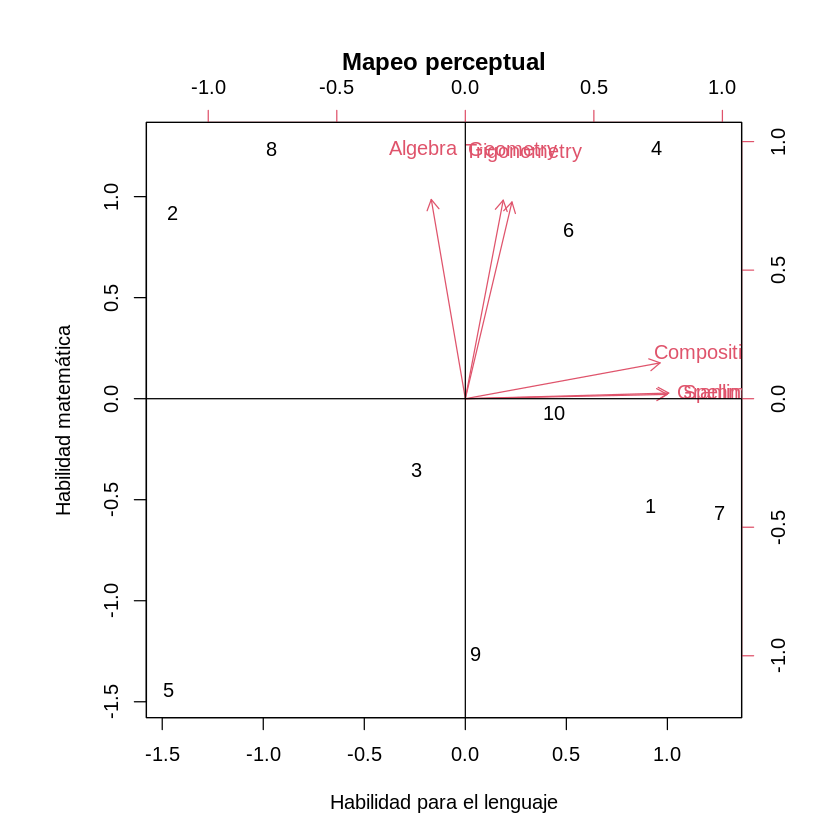

In [ ]:
colnames(fit$scores) = c("Habilidad para el lenguaje", "Habilidad matemática") # factores
biplot(fit$scores, fit$loadings, xlabs=dat[,1], main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

Observamos que el estudiante número 4 presenta un nivel alto, tanto en habilidades matemáticas como del lenguaje, al contrario del estudiante 5. Por otro lado, el estudiante 8 presenta un nivel alto en habilidades matemáticas y bajo en habilidades del lenguaje.

# Ejemplo 1 [atributos de automóviles]

In [ ]:
dat <- read.csv("cardata.csv")
head(dat)

,ID,Education,Brand,Trendy,Styling,Sportiness,Reliability,Performance,Comfort,Preference
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1,MBA,Acura,6,5,6,8,6,6,7
2,1,MBA,BMW,9,10,7,8,8,7,10
3,1,MBA,Cadillac,4,6,3,5,6,9,5
4,1,MBA,Lexus,6,7,2,9,7,8,8
5,1,MBA,Lincoln,4,5,1,5,5,9,4
6,1,MBA,Mercedes,8,9,5,8,9,8,9


Seleccionamos variables manifiestas

In [ ]:
library(dplyr)

vars_manif <- dat %>% select(-ID, -Education, -Brand, -Preference)
head(vars_manif)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Trendy,Styling,Sportiness,Reliability,Performance,Comfort
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,6,5,6,8,6,6
2,9,10,7,8,8,7
3,4,6,3,5,6,9
4,6,7,2,9,7,8
5,4,5,1,5,5,9
6,8,9,5,8,9,8


In [ ]:
summary(vars_manif)

     Trendy          Styling         Sportiness      Reliability    
 Min.   : 1.000   Min.   : 1.000   Min.   : 0.000   Min.   : 1.000  
 1st Qu.: 5.000   1st Qu.: 6.000   1st Qu.: 5.000   1st Qu.: 6.000  
 Median : 7.000   Median : 7.000   Median : 6.000   Median : 8.000  
 Mean   : 6.531   Mean   : 6.906   Mean   : 6.112   Mean   : 7.366  
 3rd Qu.: 8.000   3rd Qu.: 9.000   3rd Qu.: 8.000   3rd Qu.: 9.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
  Performance        Comfort      
 Min.   : 1.000   Min.   : 0.000  
 1st Qu.: 6.000   1st Qu.: 7.000  
 Median : 8.000   Median : 8.000  
 Mean   : 7.488   Mean   : 7.841  
 3rd Qu.: 9.000   3rd Qu.: 9.000  
 Max.   :10.000   Max.   :10.000  

In [ ]:
str(vars_manif)

'data.frame':	552 obs. of  6 variables:
 $ Trendy     : int  6 9 4 6 4 8 6 8 7 7 ...
 $ Styling    : int  5 10 6 7 5 9 4 7 6 7 ...
 $ Sportiness : int  6 7 3 2 1 5 5 6 3 7 ...
 $ Reliability: int  8 8 5 9 5 8 8 6 6 7 ...
 $ Performance: num  6 8 6 7 5 9 9 7 7 7 ...
 $ Comfort    : int  6 7 9 8 9 8 7 7 0 7 ...


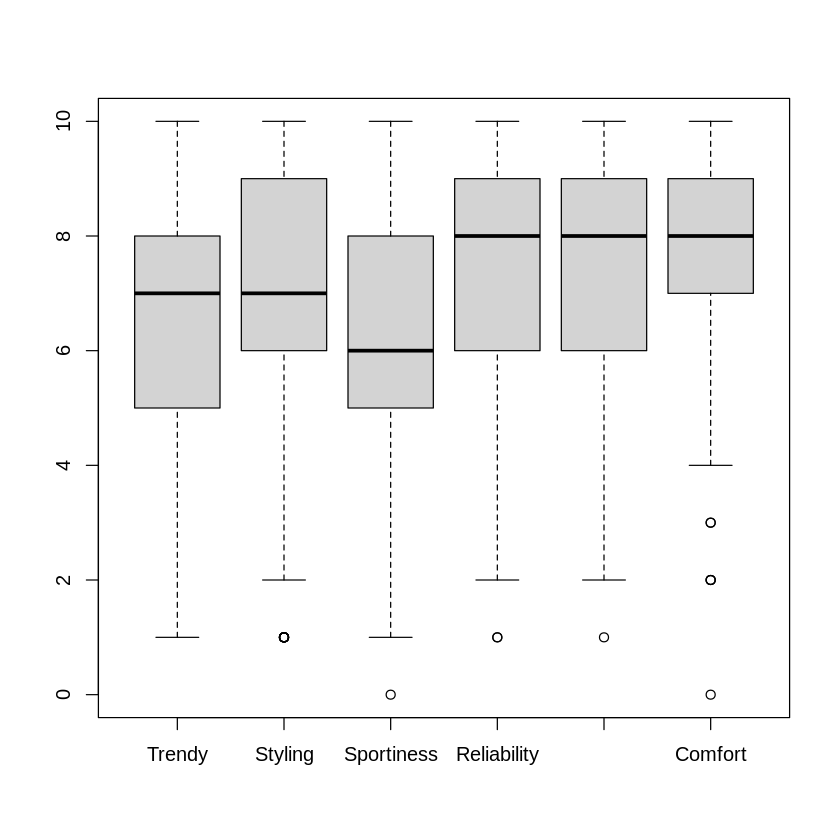

In [ ]:
boxplot(vars_manif)

## Total de factores


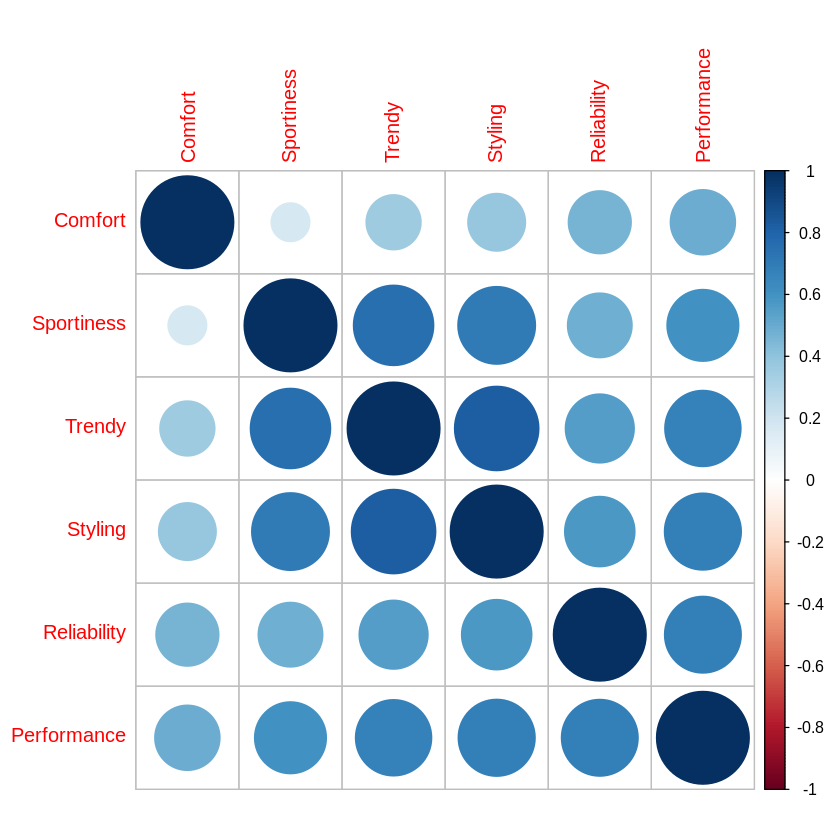

In [ ]:
corrplot(cor(vars_manif), order = "hclust")

In [ ]:
eig <- eigen(cor(vars_manif))
eig$values

[1] 3.8726005 0.9347620 0.4751468 0.2803722 0.2715605 0.1655580

In [ ]:
#con la librería nFactors
nScree(vars_manif, cor=T)

  noc naf nparallel nkaiser
1   1   1         1       1

Consideremos 2 factores [el segundo factor es cercano a 1]

## Estructura

In [ ]:
fit <- principal(vars_manif,nfactors=2, rotate="varimax")
fit$loadings


Loadings:
            RC1   RC2  
Trendy      0.880 0.266
Styling     0.843 0.329
Sportiness  0.912      
Reliability 0.522 0.632
Performance 0.663 0.577
Comfort           0.928

                 RC1   RC2
SS loadings    3.032 1.775
Proportion Var 0.505 0.296
Cumulative Var 0.505 0.801

Proyección de cada observación

In [ ]:
fit$scores[1:10,]

RC1,RC2
-0.07204076,-0.8577073
1.10990252,-0.4727826
-1.35989366,0.4271475
-0.82069119,0.8258255
-1.89909645,0.5615353
0.35310860,0.4118363
-0.39722178,0.1066404
0.31541607,-0.7473528
0.84934604,-3.5868971
0.36180301,-0.6445594


## Biplot



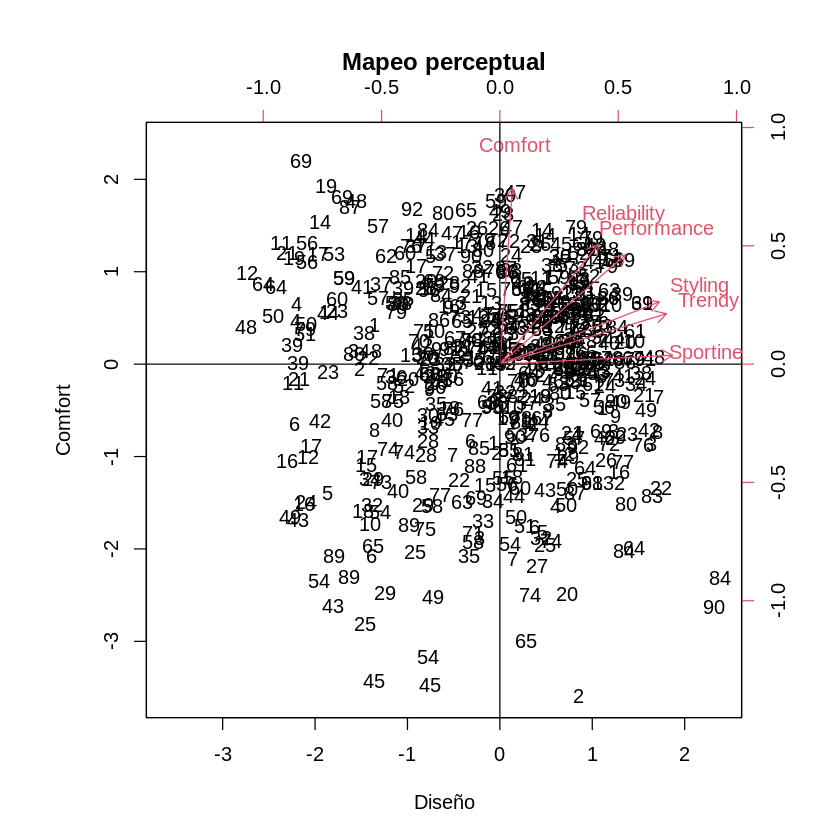

In [ ]:
colnames(fit$scores) = c("Diseño", "Comfort") # factores
biplot(fit$scores, fit$loadings, xlabs=dat[,1], main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #línea vertical

In [ ]:
summary(fit$scores)

     Diseño           Comfort       
 Min.   :-2.7485   Min.   :-3.5869  
 1st Qu.:-0.6969   1st Qu.:-0.5823  
 Median : 0.1775   Median : 0.1251  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7774   3rd Qu.: 0.6980  
 Max.   : 2.3776   Max.   : 2.1979  

## Ubicación de los productos

In [ ]:
dat_prod <- data.frame(fit$scores)
dat_prod['Brand'] <- dat$Brand

dat$labs <- ""
head(dat_prod)

,Diseño,Comfort,Brand
,<dbl>,<dbl>,<chr>
1,-0.07204076,-0.8577073,Acura
2,1.10990252,-0.4727826,BMW
3,-1.35989366,0.4271475,Cadillac
4,-0.82069119,0.8258255,Lexus
5,-1.89909645,0.5615353,Lincoln
6,0.35310860,0.4118363,Mercedes


In [ ]:
mean_score <- dat_prod %>% group_by(Brand) %>% summarise(m_diseño = mean(Diseño), m_comfort=mean(Comfort))
mean_score

Brand,m_diseño,m_comfort
<chr>,<dbl>,<dbl>
Acura,0.2116798,-0.64591309
BMW,0.9735188,0.07926120
Cadillac,-0.6776490,0.02225525
Lexus,0.1825894,0.40666055
Lincoln,-1.1314014,-0.23942875
Mercedes,0.4412624,0.37716485


Warning message:
“Setting row names on a tibble is deprecated.”


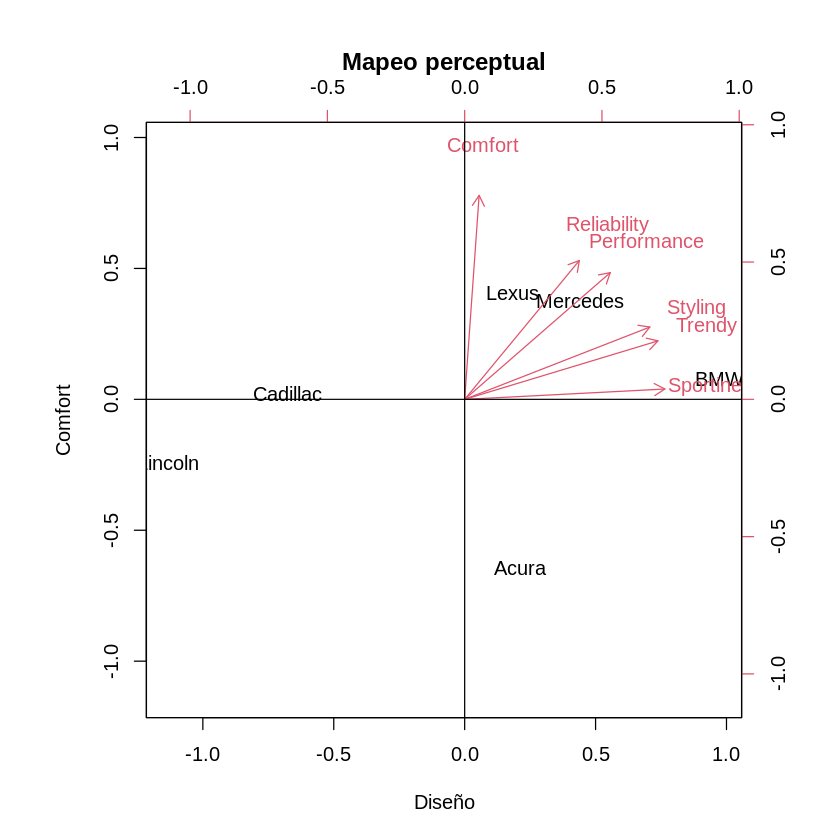

In [ ]:
biplot(mean_score[,c("m_diseño", "m_comfort")], fit$loadings, xlabs=mean_score$Brand, main = "Mapeo perceptual", xlab = "Diseño", ylab="Comfort")  
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical


## ¿Cuál es la preferencia del mercado? 

**¿Diseño o comfort?**

Aprovechamos que solicitamos a los encuestados evaluar su *preferencia* hacia cada producto. Para eso, incluiremos la variable *Preference* como variable manifiesta y revisemos hacia dónde se dirige.

In [ ]:
head(dat)

,ID,Education,Brand,Trendy,Styling,Sportiness,Reliability,Performance,Comfort,Preference,labs
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>
1,1,MBA,Acura,6,5,6,8,6,6,7,
2,1,MBA,BMW,9,10,7,8,8,7,10,
3,1,MBA,Cadillac,4,6,3,5,6,9,5,
4,1,MBA,Lexus,6,7,2,9,7,8,8,
5,1,MBA,Lincoln,4,5,1,5,5,9,4,
6,1,MBA,Mercedes,8,9,5,8,9,8,9,


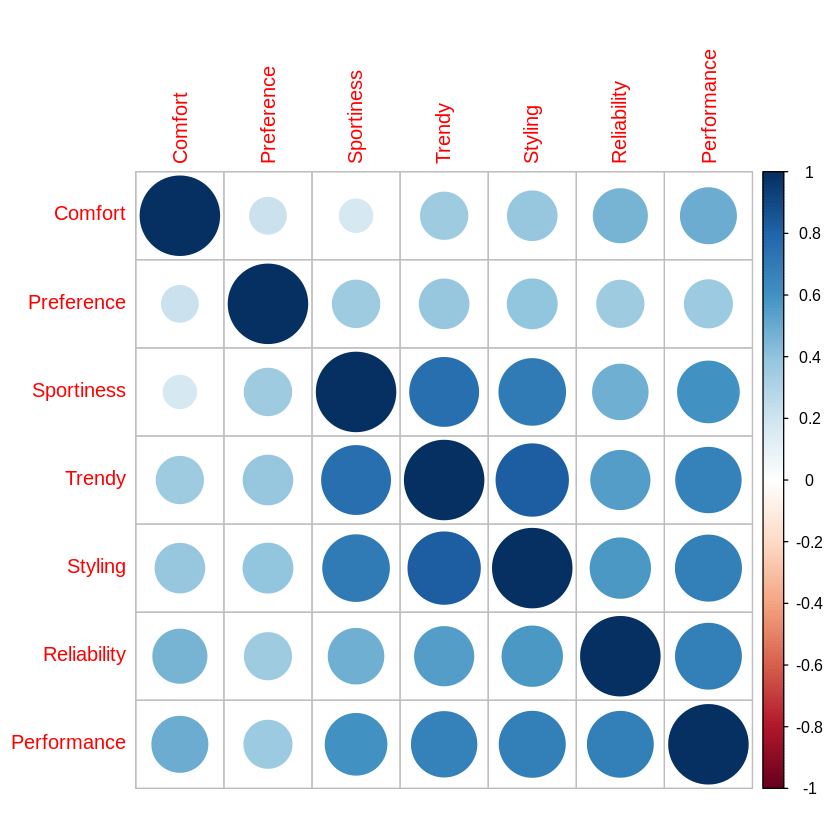

In [ ]:
vars_manif <- dat %>% select(-ID, -Education, -Brand, -labs) #incluimos la preferencia como variable manifiesta
corrplot(cor(vars_manif), order = "hclust")

In [ ]:
#estructura
fit <- principal(vars_manif,nfactors=2, rotate="varimax")
fit$loadings


Loadings:
            RC1   RC2  
Trendy      0.868 0.268
Styling     0.833 0.331
Sportiness  0.898      
Reliability 0.523 0.630
Performance 0.655 0.578
Comfort           0.929
Preference  0.527 0.168

                 RC1   RC2
SS loadings    3.240 1.806
Proportion Var 0.463 0.258
Cumulative Var 0.463 0.721

In [ ]:
fit$scores[1:10,]

RC1,RC2
-0.05469517,-0.86642398
1.13326057,-0.48197153
-1.36452397,0.43405915
-0.75525787,0.80562185
-1.90228582,0.56817943
0.36963609,0.40688971
-0.34615648,0.09147973
0.33137510,-0.75089890
0.84018951,-3.59236493
0.33164949,-0.63707201


In [ ]:
#actualizamos los scores de cada producto
dat_prod <- data.frame(fit$scores)
dat_prod['Brand'] <- dat$Brand

names(dat_prod)

mean_score <- dat_prod %>% group_by(Brand) %>% summarise(m_diseño = mean(RC1), m_comfort=mean(RC2))
mean_score

[1] "RC1"   "RC2"   "Brand"

Brand,m_diseño,m_comfort
<chr>,<dbl>,<dbl>
Acura,0.1974318,-0.64312765
BMW,0.9623773,0.08119365
Cadillac,-0.6783386,0.02406559
Lexus,0.1941126,0.40272712
Lincoln,-1.1163116,-0.24226693
Mercedes,0.4407285,0.37740821


Warning message:
“Setting row names on a tibble is deprecated.”


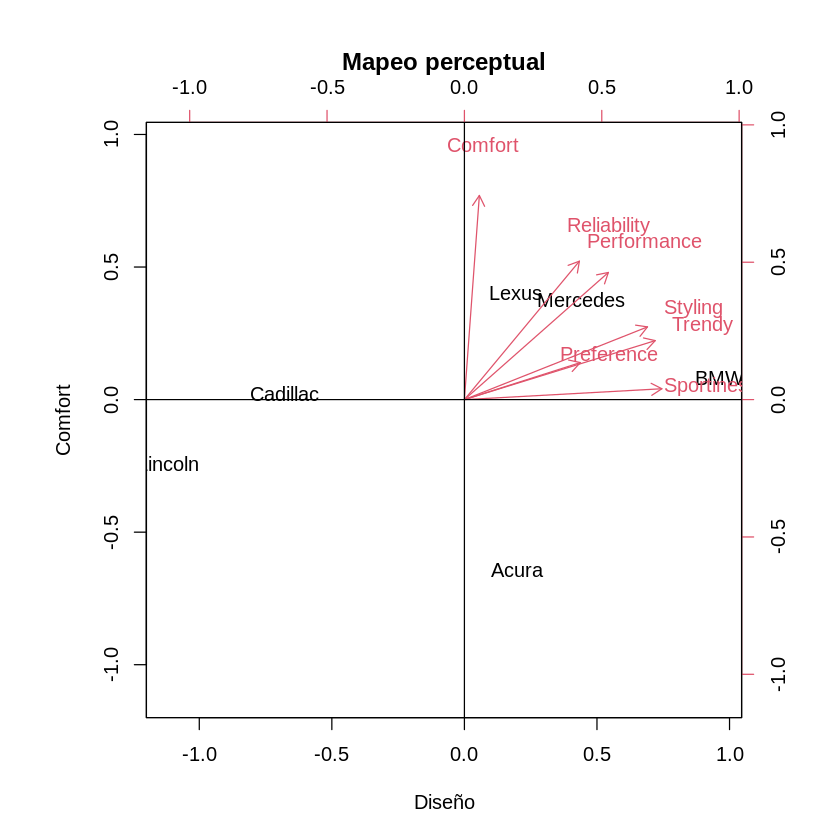

In [ ]:
biplot(mean_score[,c("m_diseño", "m_comfort")], fit$loadings, xlabs=mean_score$Brand, main = "Mapeo perceptual", xlab="Diseño", ylab="Comfort") 
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

# Ejemplo 2 [pasta de dientes] 

In [ ]:
library(readxl)
library(dplyr)

In [ ]:
dat <- read_excel("toothpaste.xlsx")
head(dat)

consumer,prevents_cavities,shiny_teeth,strengthens_gums,freshens_breath,decay_prevention_unimportant,attractive_teeth,age,gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7,3,6,4,2,4,50,Female
2,1,3,2,4,5,4,27,Female
3,6,2,7,4,1,3,24,Female
4,4,5,4,6,2,5,21,Female
5,1,2,2,3,6,2,34,Female
6,6,3,6,4,2,4,39,Female


**Variables manifiestas**:

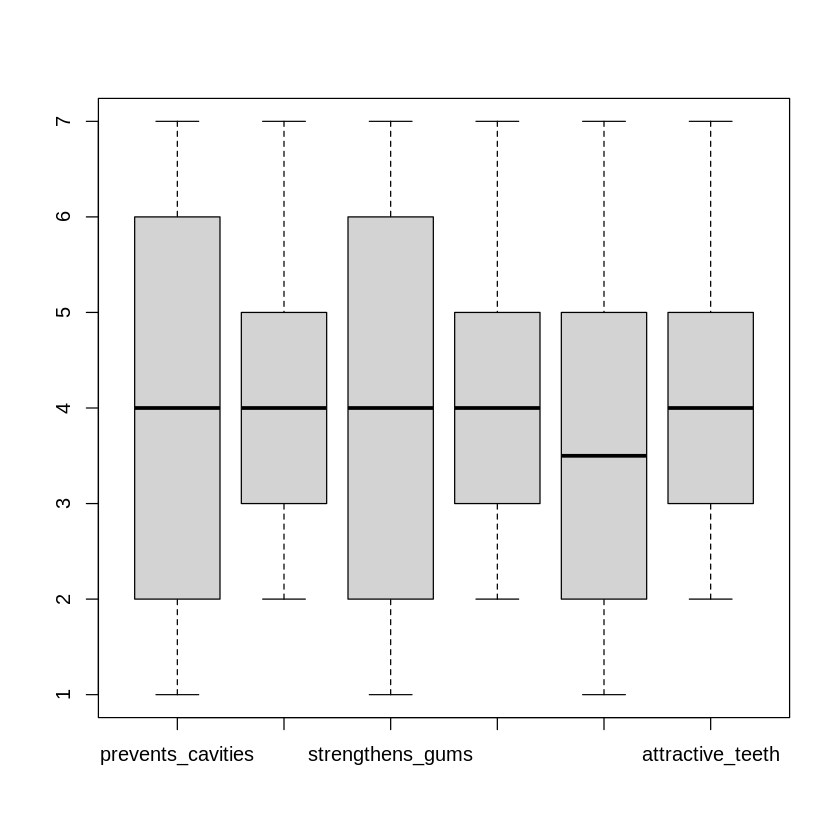

In [ ]:
manifiest <- dat %>% select(-age, -gender, -consumer)
boxplot(manifiest)

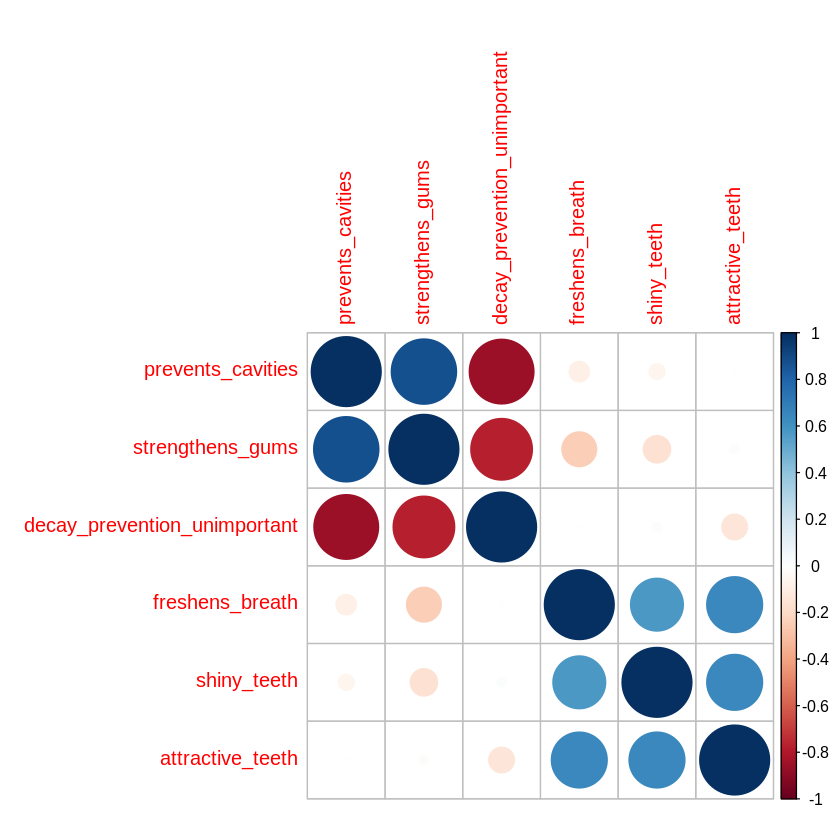

In [ ]:
library(corrplot)

corrplot(cor(manifiest), order = "hclust")

In [ ]:
eig <- eigen(cor(manifiest))
eig$values

[1] 2.73118833 2.21811927 0.44159791 0.34125765 0.18262823 0.08520861

In [ ]:
library(psych)

In [ ]:
fit <- principal(manifiest,nfactors=2, rotate="varimax")
fit$loadings


Loadings:
                             RC1    RC2   
prevents_cavities             0.962       
shiny_teeth                          0.848
strengthens_gums              0.933 -0.151
freshens_breath                      0.855
decay_prevention_unimportant -0.934       
attractive_teeth                     0.885

                 RC1   RC2
SS loadings    2.687 2.263
Proportion Var 0.448 0.377
Cumulative Var 0.448 0.825

In [ ]:
fit$scores[1:10,]

RC1,RC2
1.1532574,-0.3049551
-1.1741087,-0.3364147
1.2860227,-0.8622110
0.2854688,1.1149050
-1.4269062,-1.4905341
0.9708083,-0.3095521
0.3894893,-0.9374408
1.3256082,-0.0255702
-1.0224225,-0.6446994
-1.3052576,1.5585980


In [ ]:
fit$weights

,RC1,RC2
prevents_cavities,0.3584503538,0.009031517
shiny_teeth,0.0003948676,0.375029969
strengthens_gums,0.3449550456,-0.044523335
freshens_breath,-0.0148037305,0.376748047
decay_prevention_unimportant,-0.3505499553,-0.057490945
attractive_teeth,0.0538212664,0.394380217


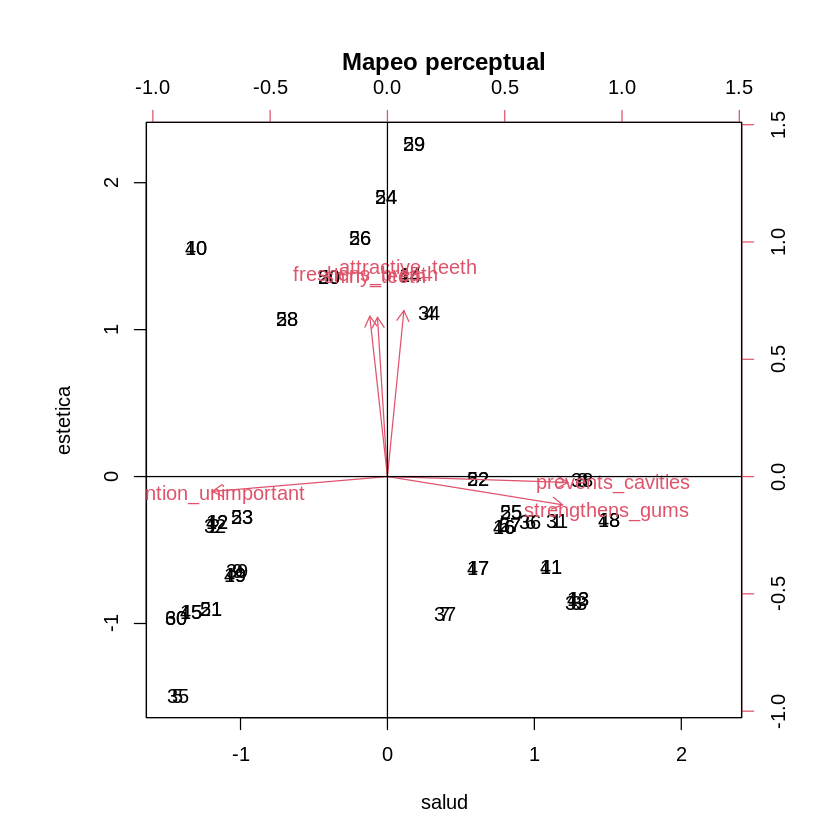

In [ ]:
colnames(fit$scores) = c("salud", "estetica") # factores
biplot(fit$scores, fit$loadings, xlabs=dat$consumer,  main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #línea vertical

# Práctica

En esta práctica, explorarás un conjunto de datos que tiene el registro de las calificaciones asignadas a diferentes atributos, de distintas marcas de café, por consumidores consultados a partir de una encuesta.

1. Explora el conjunto de datos identificando su  estructura, la distribución y escala de las variables.
2. Utiliza el análisis de factores para construir un mapa perceptual para visualizar el posicionamiento de las distintas marcas. **Nota:** en esta práctica, aunque pueden ser necesarios más de dos factores para explicar los resultados de la encuesta, utiliza solo dos para hacer el análisis. 



Puedes acceder al conjunto de datos ejecutando el código de la siguiente celda:

In [ ]:
dat_practica <- read.csv("http://goo.gl/IQl8nc")
head(dat_practica)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2,4,8,8,2,9,7,4,6,a
2,1,1,4,7,1,1,1,2,2,a
3,2,3,5,9,2,9,5,1,6,a
4,1,6,10,8,3,4,5,2,1,a
5,1,1,5,8,1,9,9,1,1,a
6,2,8,9,5,3,8,7,1,2,a


In [ ]:
vars_manif_practica <- dat_practica[0:9] #variables manifestas 

cor(vars_manif_practica)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
perform,1.000000000,0.50020206,-0.122445813,-0.2563323,0.359172206,0.05712937,0.10194610,0.008733494,0.3066588
leader,0.500202058,1.00000000,0.026890447,-0.2903576,0.571215126,0.03309405,0.11831017,0.066512436,0.2087004
latest,-0.122445813,0.02689045,1.000000000,0.2451545,0.009951527,-0.25441902,-0.34271372,0.627627667,-0.3971802
fun,-0.256332316,-0.29035764,0.245154457,1.0000000,-0.281097443,-0.06655280,-0.14521849,0.127973639,-0.2371607
serious,0.359172206,0.57121513,0.009951527,-0.2810974,1.000000000,-0.00265559,0.02375656,0.121009377,0.1807027
bargain,0.057129372,0.03309405,-0.254419016,-0.0665528,-0.002655590,1.00000000,0.73962672,-0.350533746,0.4673811
value,0.101946104,0.11831017,-0.342713717,-0.1452185,0.023756556,0.73962672,1.00000000,-0.434534536,0.5059617
trendy,0.008733494,0.06651244,0.627627667,0.1279736,0.121009377,-0.35053375,-0.43453454,1.000000000,-0.2982462
rebuy,0.306658801,0.20870036,-0.397180225,-0.2371607,0.180702720,0.46738109,0.50596166,-0.298246195,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



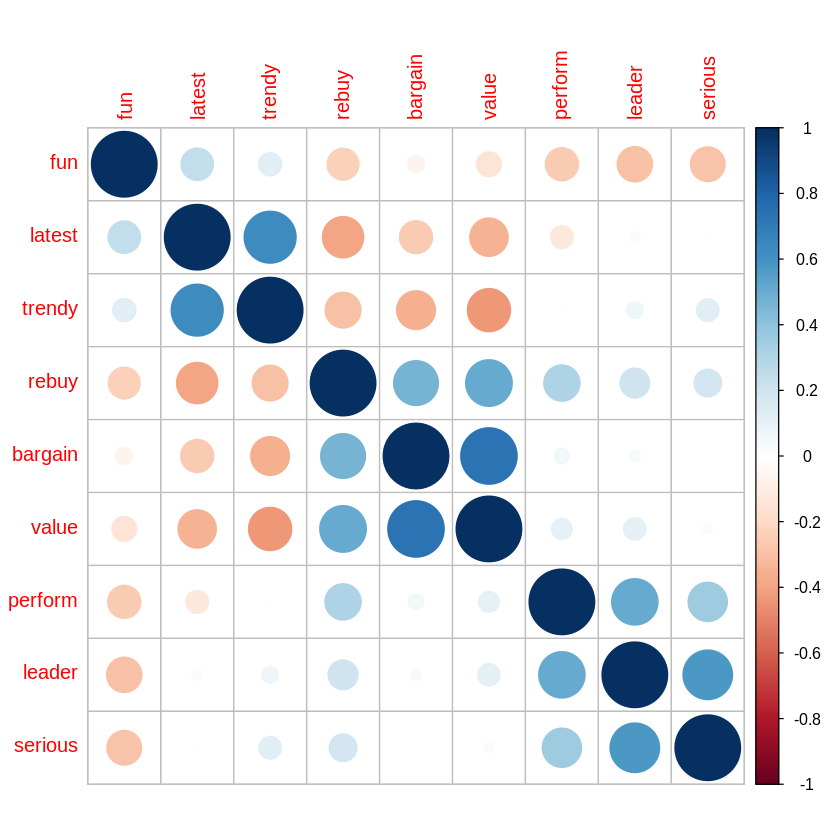

In [ ]:
install.packages("corrplot")
library(corrplot)

corrplot(cor(vars_manif_practica), order = "hclust")

In [ ]:
eig <- eigen(cor(vars_manif_practica))
eig$values

[1] 2.9792956 2.0965517 1.0792549 0.7272110 0.6375459 0.5348432 0.3901044
[8] 0.3120464 0.2431469

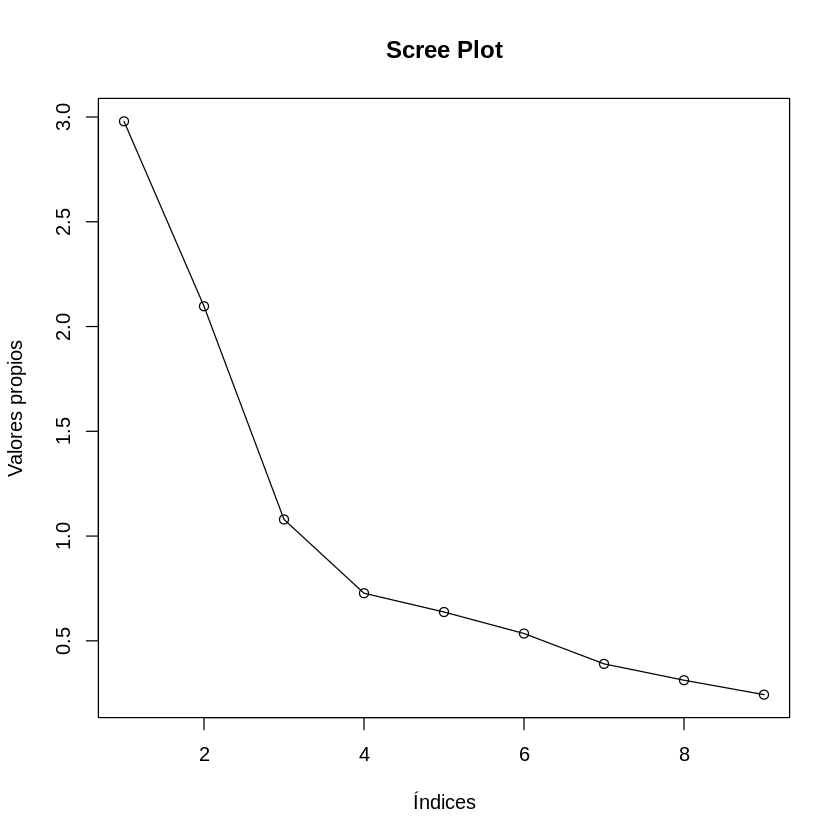

In [ ]:
plot(eig$values, main="Scree Plot", t='l', ylab = "Valores propios", xlab="Índices")
points(eig$values)

In [ ]:
install.packages("nFactors")
library(nFactors)
nScree(vars_manif_practica, cor=T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  noc naf nparallel nkaiser
1   3   2         3       3

In [ ]:
library(psych)
fit_practica <- principal(vars_manif_practica,nfactors=3, rotate="varimax")

In [ ]:
fit_practica$loadings


Loadings:
        RC2    RC1    RC3   
perform  0.723              
leader   0.832              
latest         -0.201  0.871
fun     -0.526         0.477
serious  0.785              
bargain         0.909       
value           0.879 -0.211
trendy   0.159 -0.331  0.770
rebuy    0.321  0.623 -0.316

                 RC2   RC1   RC3
SS loadings    2.239 2.161 1.755
Proportion Var 0.249 0.240 0.195
Cumulative Var 0.249 0.489 0.684

In [ ]:
fit_practica$weights

,RC2,RC1,RC3
perform,0.32220484,-0.007812555,-0.02301553
leader,0.37462977,0.038590336,0.10790099
latest,0.01751890,0.125126337,0.55892722
fun,-0.23463257,0.196561000,0.34513466
serious,0.35773089,-0.010863999,0.07936525
bargain,-0.06516430,0.506320402,0.19499200
value,-0.03059865,0.448147777,0.09457163
trendy,0.10279176,0.012303175,0.45441432
rebuy,0.10712385,0.256173984,-0.04570612


In [ ]:
fit_practica$scores

RC2,RC1,RC3
-0.8640183,1.84170246,0.71362318
-1.4328558,-1.48202054,-1.36501466
-1.1971608,1.38944342,-0.32273847
-0.6749925,0.11587853,0.50923422
-1.8897715,1.53856294,-0.30509693
-0.1549943,1.11674094,0.21352357
-1.6044827,-0.78715213,-1.03873736
-1.1176790,0.86203478,0.54449161
-1.7187893,1.06591071,0.92179394
-1.3302432,-0.55035011,0.22878188


In [ ]:
vars_manif_practica[1:12,]

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,4,8,8,2,9,7,4,6
2,1,1,4,7,1,1,1,2,2
3,2,3,5,9,2,9,5,1,6
4,1,6,10,8,3,4,5,2,1
5,1,1,5,8,1,9,9,1,1
6,2,8,9,5,3,8,7,1,2
7,1,1,5,7,1,5,1,1,1
8,2,1,7,5,2,8,7,7,1
9,2,1,8,10,1,7,7,5,1


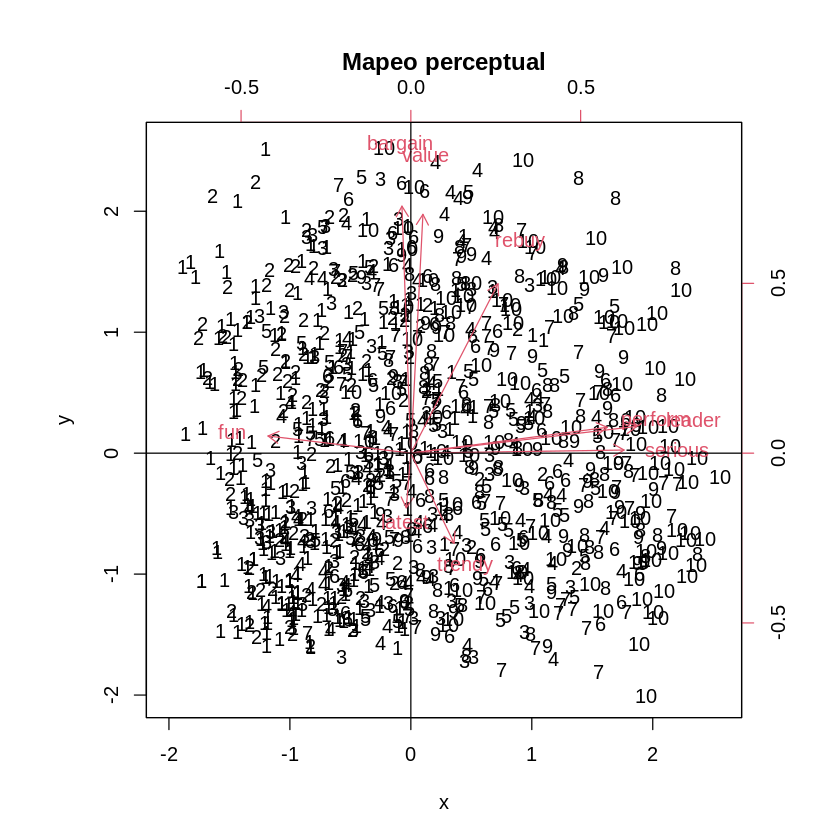

In [ ]:
colnames(fit_practica$scores) = c("x", "y", "z") # factores
biplot(fit_practica$scores, fit_practica$loadings, xlabs=dat_practica[,1], main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

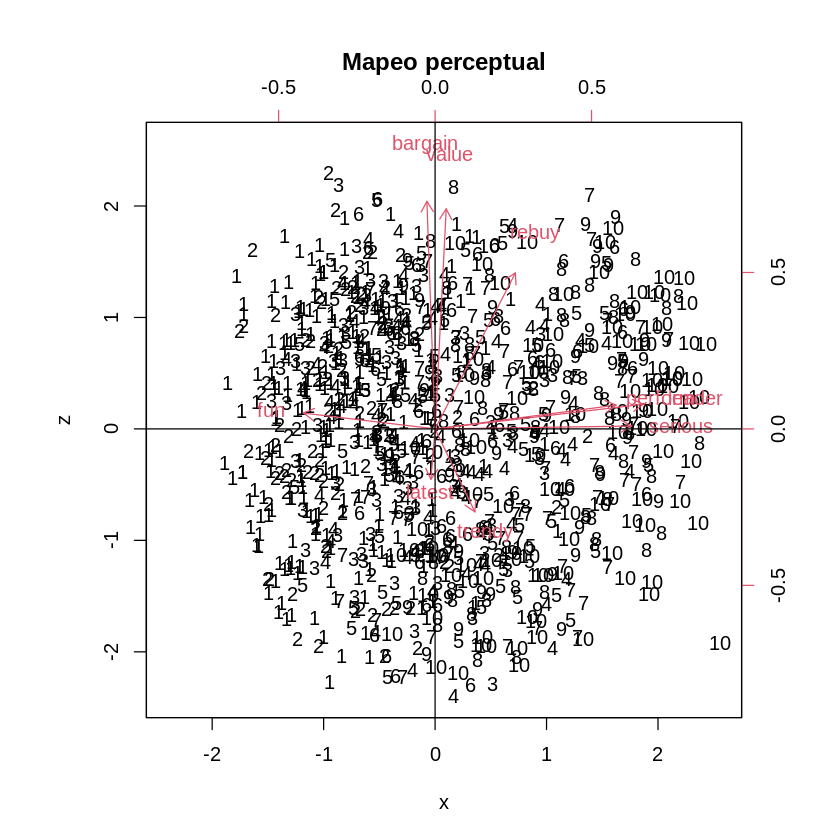

In [ ]:
biplot(fit_practica$scores[,c("x", "z")], fit_practica$loadings, xlabs=dat_practica[,1], main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

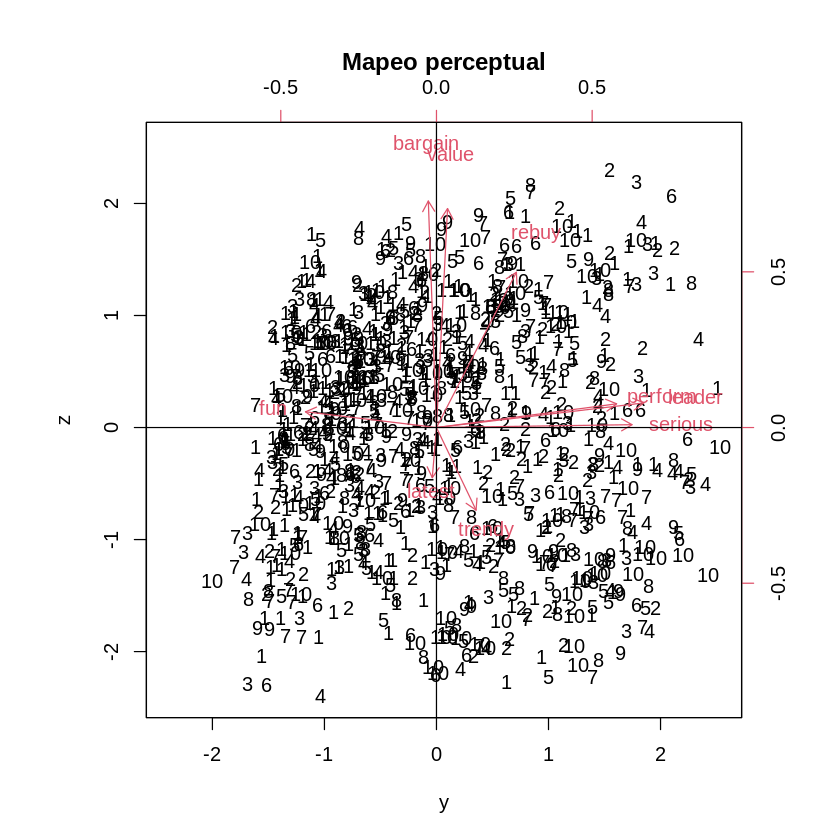

In [ ]:
biplot(fit_practica$scores[,c("y", "z")], fit_practica$loadings, xlabs=dat_practica[,1], main = "Mapeo perceptual")  
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

In [ ]:
summary(fit_practica$scores)

       x                 y                 z           
 Min.   :-1.8898   Min.   :-2.0041   Min.   :-2.39239  
 1st Qu.:-0.7938   1st Qu.:-0.8174   1st Qu.:-0.77112  
 Median :-0.1538   Median :-0.1317   Median : 0.08038  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6945   3rd Qu.: 0.7529   3rd Qu.: 0.79243  
 Max.   : 2.5523   Max.   : 2.5268   Max.   : 2.29869  

In [ ]:
dat_prod_practica <- data.frame(fit_practica$scores)
dat_prod_practica['Brand'] <- dat_practica$brand

dat_practica$labs <- ""
head(dat_prod_practica)

,x,y,z,Brand
,<dbl>,<dbl>,<dbl>,<chr>
1,-0.8640183,1.8417025,0.7136232,a
2,-1.4328558,-1.4820205,-1.3650147,a
3,-1.1971608,1.3894434,-0.3227385,a
4,-0.6749925,0.1158785,0.5092342,a
5,-1.8897715,1.5385629,-0.3050969,a
6,-0.1549943,1.1167409,0.2135236,a


In [ ]:
library(dplyr) 
mean_score_practica <- dat_prod_practica %>% group_by(Brand) %>% summarise(x = mean(x), y=mean(y), z=mean(z))
mean_score_practica

Brand,x,y,z
<chr>,<dbl>,<dbl>,<dbl>
a,-1.09626675,0.20901475,0.1946609
b,1.45928881,0.07966015,0.6063110
c,1.32029981,-0.69078498,-0.2835684
d,-0.61772538,-0.91066342,0.2555178
e,-0.18654770,0.60439712,0.6027842
f,0.29538558,1.04216033,-0.8678992
g,0.05864475,1.07961147,-1.3266879
h,-0.22979231,-0.67510683,0.6866718
i,-0.07598665,-0.42151091,0.4392064


Warning message:
“Setting row names on a tibble is deprecated.”


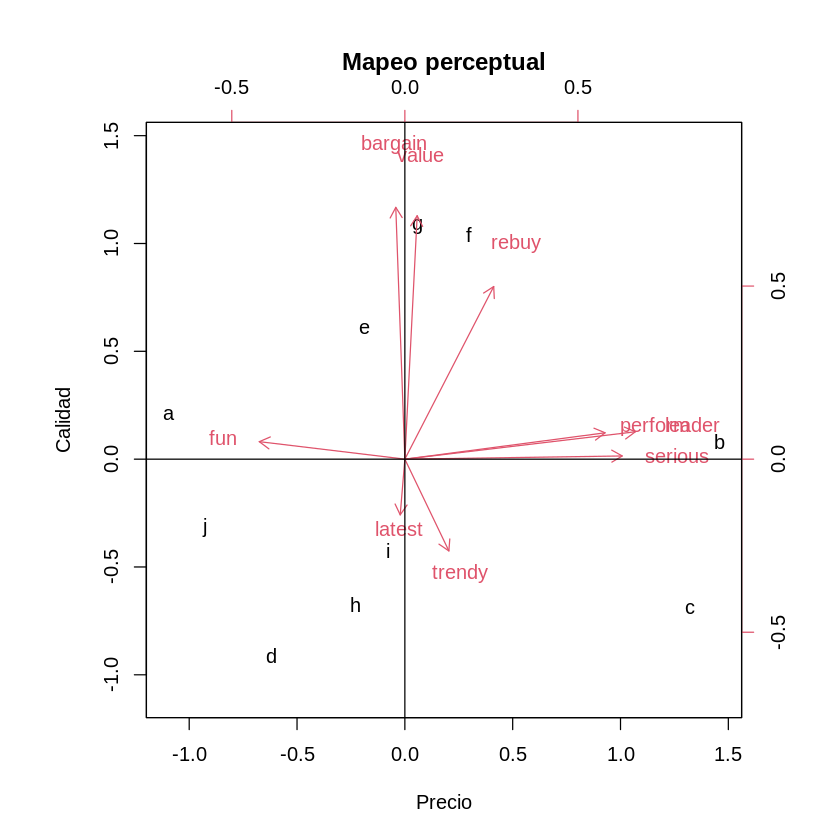

In [ ]:
biplot(mean_score_practica[,c("x", "y")], fit_practica$loadings, xlabs=mean_score_practica$Brand, main = "Mapeo perceptual", xlab="Precio", ylab="Calidad") 
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

Warning message:
“Setting row names on a tibble is deprecated.”


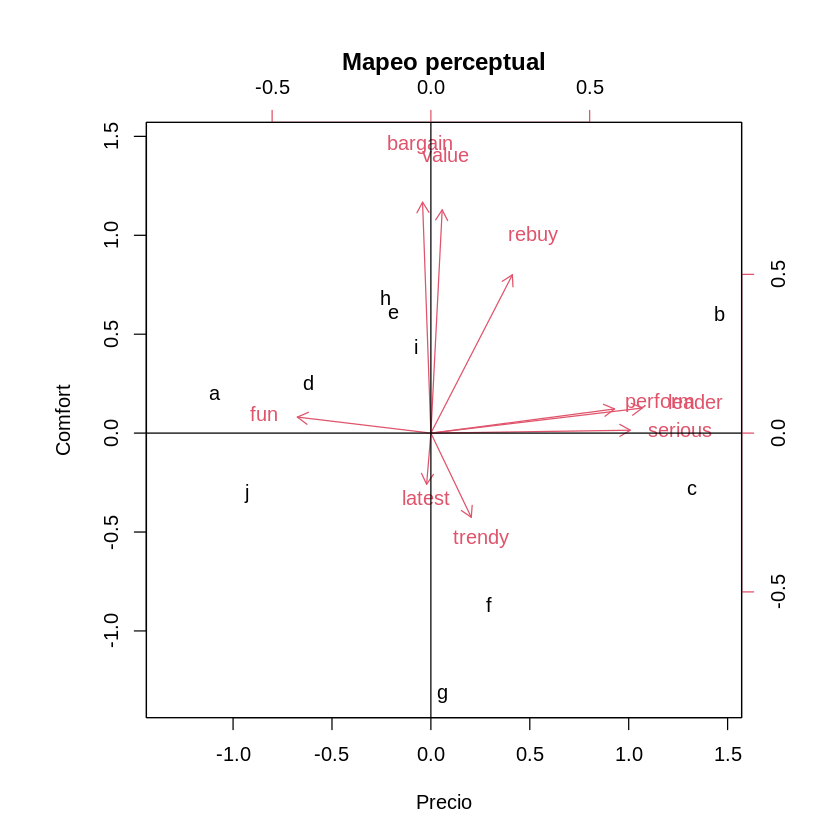

In [ ]:
biplot(mean_score_practica[,c("x", "z")], fit_practica$loadings, xlabs=mean_score_practica$Brand, main = "Mapeo perceptual", xlab="Precio", ylab="Comfort") 
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical

Warning message:
“Setting row names on a tibble is deprecated.”


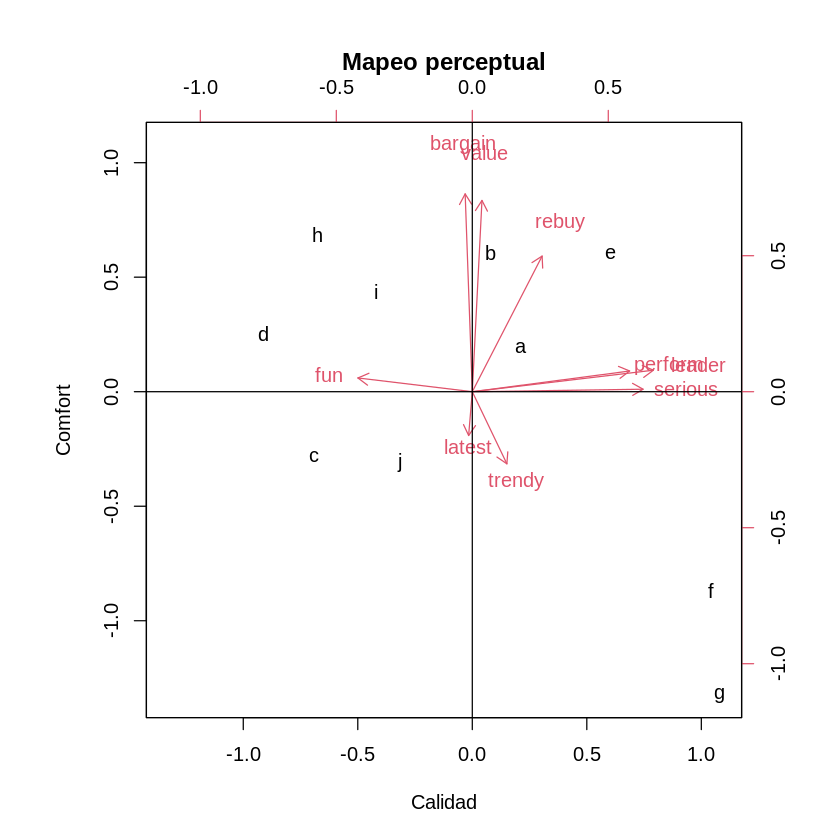

In [ ]:
biplot(mean_score_practica[,c("y", "z")], fit_practica$loadings, xlabs=mean_score_practica$Brand, main = "Mapeo perceptual", xlab="Calidad", ylab="Comfort") 
abline(h=0) #línea horizontal
abline(v=0) #líneal vertical